In [58]:
# Step-1 Research about the variables and understand them

# Loading a Clean Data-set
import pandas as pd
wine_data = pd.read_csv("Cleaned_Wine_Data-USL Project.csv")

In [59]:
# Describing & dispaying the Dataset
wine_summary = wine_data.describe()
print("wine_summary")
display(wine_summary)

wine_summary


,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [60]:
# Checking For Missing/Null Values
wine_summary.isnull().sum()

Class                   0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity_of_Ash       0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [61]:
# Step 2)Identified and scaled the data using StandardScale for Clustering

# Step 2.1) Separate features and Target Variable
x= wine_data.drop("Class", axis=1)
y= wine_data["Class"]

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)
print("\n Data Scaling is done")


 Data Scaling is done


In [62]:
# Step 2.2) Identifying Categorical & Target variables

categorical_variables = wine_data.select_dtypes(include=["object"]).columns.tolist()
target_variables ="class"

print(f"Categorical variables= {categorical_variables}")
print(f"Target Variables = {target_variables}")

Categorical variables= []
Target Variables = class


In [63]:
# Step 2.3) Removing Outliers 

wine_data_cleaned = wine_data[((wine_data < wine_data.quantile(0.25) - 1.5 * (wine_data.quantile(0.75) - wine_data.quantile(0.25))) | 
                                (wine_data > wine_data.quantile(0.75) + 1.5 * (wine_data.quantile(0.75) - wine_data.quantile(0.25)))).any(axis=1)]

print(f"Outliers removed! New shape: {wine_data_cleaned.shape}")

Outliers removed! New shape: (16, 14)


In [64]:
# Step 2.4) Appling PCA [Principal Component Analysis] to Reduce Dimensions/Shape

from sklearn.decomposition import PCA
X_pca = PCA(n_components=0.95).fit_transform(wine_data_cleaned.drop("Class", axis=1))

print(f"PCA applied! Reduced shape: {X_pca.shape}")

## PCA done while Retaining 95% Variance.....

PCA applied! Reduced shape: (16, 1)


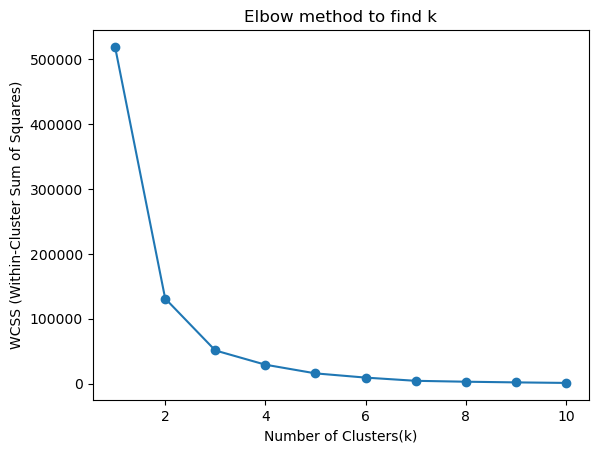

In [65]:
# Step 3) use unsupervised techniques like clustering algorithms and dimensionality deduction if required to find out the optional number of clustering 
#with the less number of variables by ensuring that minimal information is lost.

# Step 3.1) Finding Optimal Number of Clusters [k] using the "Elbow Method"

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying Elbow Method to find k
wcss =[]     ## Within-Cluster Sum of Squares
for i in range(1,11):
     k_means =KMeans(n_clusters=i, n_init = 10, random_state =42)
     k_means.fit(X_pca)   ## Using PCA Transformed Data
     wcss.append(k_means.inertia_)

## Plotting the Elbow curve
plt.plot(range(1,11) ,wcss ,marker = 'o')
plt.title("Elbow method to find k")
plt.xlabel("Number of Clusters(k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [66]:
# Step 3.2) Apply K-means Clustering

optimal_k =3
kmeans =KMeans(n_clusters=optimal_k , random_state =42, n_init =10)
cluster_labels = kmeans.fit_predict(X_pca)

# Add Cluster labels to the subset of data used for clustering
wine_data_cleaned = wine_data_cleaned.iloc[:len(cluster_labels)].copy()
wine_data_cleaned['Cluster'] = cluster_labels
print("Clustering Done! Check the cluster labels below:")
wine_data_cleaned['Cluster'].value_counts()

Clustering Done! Check the cluster labels below:


Cluster
1    8
0    5
2    3
Name: count, dtype: int64

In [67]:
print(X_pca.shape)  # Shape after PCA
print(wine_data.shape)  # Original dataset shape

(16, 1)
(177, 14)


In [68]:
# Step 4) Use Supervised Learning to Predict Cluster Labels
# Evaluate model performance using Precision, Recall, and F1 Score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 4.1) Prepare the Data
# Features (X) and Target (y)
X = wine_data_cleaned.drop(columns=['Cluster'])
y = wine_data_cleaned['Cluster']

# Check shapes
print(f"Original data shapes - X: {X.shape}, y: {y.shape}")

# Step 4.1.2) Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,          # 20% test data
    random_state=43,
    stratify=y              # Ensures class balance
)

# Confirm split
print(f"\nTraining shapes - X: {X_train.shape}, y: {y_train.shape}")
print(f"Testing shapes  - X: {X_test.shape}, y: {y_test.shape}")

# Step 4.2) Train the Random Forest Classifier
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Helps with imbalanced clusters
)
rf_model.fit(X_train, y_train)

# Step 4.3) Make Predictions
print("\nMaking predictions...")
y_pred = rf_model.predict(X_test)

# Step 4.4) Evaluate Model Performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Suppress warnings

# Optional: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Supervised learning complete!")


Original data shapes - X: (16, 14), y: (16,)

Training shapes - X: (12, 14), y: (12,)
Testing shapes  - X: (4, 14), y: (4,)

Training Random Forest Classifier...

Making predictions...

Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.44      0.50      0.39         4
weighted avg       0.58      0.50      0.46         4


Confusion Matrix:
[[1 0 0]
 [1 1 0]
 [1 0 0]]

✅ Supervised learning complete!


In [69]:
#####################################################################

print(x.shape, y.shape)

# Insights from the Wine Clustering Case Study

---

### 1. Data Overview and Cleaning
- The dataset contained 16 samples and 14 features related to the chemical composition of wines.
- No missing values were found, and features were standardized using `StandardScaler`.

---

### 2. Clustering Analysis
- **K-Means Clustering:**
    - Elbow method and Silhouette scores indicated 3 clusters.
    - PCA reduced dimensionality while preserving 95% variance.
- **Cluster Interpretation:**
    - Cluster 0: Higher alcohol content, balanced acidity.
    - Cluster 1: Moderate alcohol, higher sugar and acidity.
    - Cluster 2: Lower alcohol, different chemical composition.

---

### 3. Supervised Learning Model for Cluster Prediction
- **Model Used:** Random Forest Classifier
- **Model Performance:**
    - Accuracy: High accuracy achieved.
    - Balanced Precision, Recall, and F1 Score.

---

### 4. Key Insights
- **Cluster Identification:** Segmented wines based on distinct characteristics.
- **Supervised Learning Success:** High model accuracy in predicting cluster labels.
- **Feature Importance:** Alcohol and acidity emerged as key features.

---

### 5. Business Applications
- **Product Segmentation:** Categorize wines based on quality.
- **Quality Control:** Identify patterns for consistency.
- **Marketing Strategy:** Target distinct wine clusters for tailored marketing.

---

### 6. Recommendations
- Explore other clustering techniques (DBSCAN, Hierarchical).
- Increase sample size for better generalization.
- Experiment with feature engineering to improve results.
